# 損失関数(二乗和誤差、交差エントロピー誤差)


**二乗和誤差の動作確認**

In [ ]:
import numpy as np
# 実験用の正解データ
t = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0])
# 実験用の出力データ
y = np.array([-0.1, 0.05, 1, 0.3, 0.7, -0.02, 0.8, 0.1, 0.9, 0.02])

def square_sum(y, t):
    # s = 0.5 * np.sum(np.square(y - t))
    s = 1.0/2.0 * ((y - t)**2).sum()    #上と同じことをやっています
    return s 

# 誤差が小さいほど精度がよい
err = square_sum(y, t)
print('二乗和誤差の計算結果：',err)

二乗和誤差の計算結果： 0.12665


**二乗和誤差の作成**

以下のコメントに従って、二乗和誤差を求めるプログラムを完成させよう

In [ ]:
import numpy as np

# 乱数を発生させるために seed 値を設定する
np.random.seed(25)

# 正解データは7つ
t = np.array([0,0,0,0,0,0,0])
# 出力データ
# -1～1までの一様分布からランダムにデータを7つ生成しyに格納する
# いくつデータが必要か考えてください
y = np.random.uniform(-1, 1, 7)

def square_sum(y, t):
    # s = 0.5 * np.sum(np.square(y - t))
    s = 0.5 * ((y - t)**2).sum()    #上と同じだよ
    return s 

square_sum(y, t)

0.9596868667277934

二乗和誤差で、なぜ誤差を「二乗」しているのか、その理由を考えよう。
作成した「二乗和誤差」のソースを二乗せずに、プラスとマイナスのデータが混在する出力データを計算させたらどうなりますか？

In [ ]:
import numpy as np
# 実験用の正解データ
t = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0])
# 実験用の出力データ
y = np.array([-0.1, 0.05, 1, 0.3, 0.7, -0.02, 0.8, 0.1, 0.9, 0.02])

def square_sum(y, t):
    # ここに誤差の総和 * 0.5したものを計算
    s = 0.5 * (y - t).sum()
    return s 

# 誤差が小さいほど精度がよいが…
err = square_sum(y, t)

print('二乗しない和誤差の計算結果：',err)

二乗しない和誤差の計算結果： -0.125


**交差エントロピー誤差**

10個の要素（0～9の要素）の場合の、交差エントロピー誤差の動作を確認しよう。

以下データは分類処理の正解データと、出力の例です。

とある画像群から0～9の文字を学習する場合の正解データは、0の場合、[1,0,0,0,0,0,0,0,0,0]のような形で与えられます。（添え字の0番目を0の結果、1番目を1の結果…）**→One-Hot表現**

以下の例における「出力」とは、ニューラルネットワークで出力された値とします。

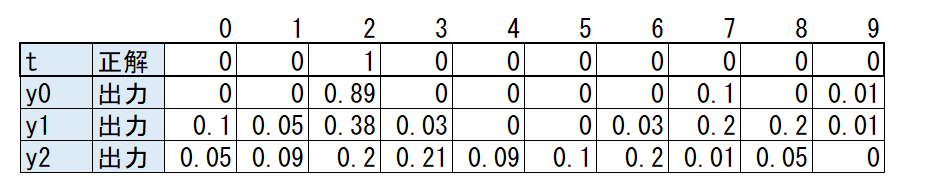

y0→誤差がかなり小さい

y1→誤差それなりにある

y2→誤差かなり大きい

In [ ]:
# 実験用の正解データ
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# 実験用の出力データ０
y0 = np.array([0, 0, 0.89, 0, 0, 0, 0, 0.1, 0.1, 0.01])

# 実験用の出力データ１
y1 = np.array([0.1, 0.09, 0.2, 0.21 , 0.09, 0.1, 0.2, 0.01, 0.05, 0])

# 実験用の出力データ２
y2 = np.array([0.05, 0.09, 0.2, 0.21, 0.09, 0.1, 0.2, 0.01, 0.05, 0])

# 交差エントロピー誤差
def cross_entropy(y, t):
    # 微小な値（0.0000001→10のマイナス7乗）を作成。
    # ここのeはネイピア数ではないので注意！
    e = 1e-7 # 微小値
    
    # 交差エントロピー誤差の計算
    return -1 * (np.sum(t * np.log(y + e)))

err0 = cross_entropy(y0, t)
print('y0の交差エントロピー誤差の計算結果', err0)

err1 = cross_entropy(y1, t)
print('y1の交差エントロピー誤差の計算結果', err1)

err2 = cross_entropy(y2, t)
print('y2の交差エントロピー誤差の計算結果', err2)

y0の交差エントロピー誤差の計算結果 0.11653370389640733
y1の交差エントロピー誤差の計算結果 1.6094374124342252
y2の交差エントロピー誤差の計算結果 1.6094374124342252


**交差エントロピー誤差式の意味**

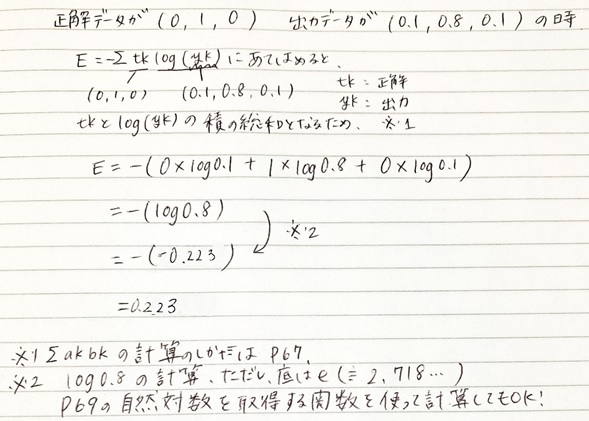


▼logの計算がわからない場合はP69で作成した関数を使用しよう。
計算・数学で苦しむ必要なし！便利なサイトもあります。
https://keisan.casio.jp/exec/system/1260332465


**交差エントロピー誤差の出力練習**

ある人の服のサイズを予測するモデルが2つあり、予測値は、Sサイズ、Mサイズ、Lサイズのいずれかの結果を出力します。正解はMサイズです。

*   1つ目のモデルは出力結果が 0.1, 0,8, 0.1
*   2つ目のモデルの出力結果は 0.25, 0.6, 0

の場合の、それぞれの交差エントロピー誤差を計算し出力しましょう。
また、どちらのモデルのほうが性能がいいか、画面に出力してください。

**ヒント：**
正解データは、サイズ順になっていて、リストの0番目はS,リストの1番目はM,リストの2番目はLを表します。（Mサイズの場合は0, 1, 0となる）


In [ ]:
import numpy as np
# 正解データ
t = np.array([0, 1, 0])

# 実験用の出力データ
y1 = np.array([0.1, 0.8, 0.1])
y2 = np.array([0.4, 0.6, 0])

# 交差エントロピー誤差
def cross_entropy(y, t):
    return - np.sum(t * np.log(y + 1e-7))

err1 = cross_entropy(y1, t)
print('1つ目のモデルの交差エントロピー誤差の計算結果：', err1)
err2 = cross_entropy(y2, t)
print('2つ目のモデルの交差エントロピー誤差の計算結果：', err2)
if err1 < err2:
  anser = err1
  name = 'モデル1'
else:
  anser = err2
  name = 'モデル2'
print('より精度のいいモデルは、誤差', anser, 'の', name, 'です')
print('より精度のいいモデルは、誤差', min(err1, err2), 'の', np.where(err1 < err2, 'モデル1', 'モデル2'), 'です')

1つ目のモデルの交差エントロピー誤差の計算結果： 0.22314342631421757
2つ目のモデルの交差エントロピー誤差の計算結果： 0.510825457099338
より精度のいいモデルは、誤差 0.22314342631421757 の モデル1 です
より精度のいいモデルは、誤差 0.22314342631421757 の モデル1 です
